In [12]:
import sys
sys.path.append("..")

In [18]:
import os
import json
import cv2
import numpy as np
from glob import glob

def load_keypoints_from_json(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    keypoints = []
    for shape in data['shapes']:
        if shape['shape_type'] == 'point':
            x, y = shape['points'][0]
            keypoints.append([x, y])
    return np.array(keypoints, dtype=np.float32)

def visualize_keypoints(image, keypoints, radius=3, color=(0, 255, 0), use_matplotlib=True):
    import matplotlib.pyplot as plt
    img_vis = image.copy()
    for (x, y) in keypoints:
        cv2.circle(img_vis, (int(x), int(y)), radius, color, -1)

    if use_matplotlib:
        if img_vis.shape[2] == 3:
            img_vis = cv2.cvtColor(img_vis, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 8))
        plt.imshow(img_vis)
        plt.axis("off")
        plt.title("Image with Keypoints")
        plt.show()
    else:
        cv2.imshow("Image with Keypoints", img_vis)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

def visualize_all_from_folder(data_dir, image_id=6756):
    image_paths = sorted(glob(os.path.join(data_dir, "*.JPG")))
    for img_path in image_paths:
        json_path = img_path.replace(".JPG", ".json")
        if not os.path.exists(json_path):
            continue
        each_image_id = os.path.basename(img_path).split('.')[0].split('_')[-1]
        if each_image_id != str(image_id):
            continue
        img = cv2.imread(img_path)
        kpts = load_keypoints_from_json(json_path)
        print(f"Showing {os.path.basename(img_path)}")
        visualize_keypoints(img, kpts)

Showing IMG_6813.JPG


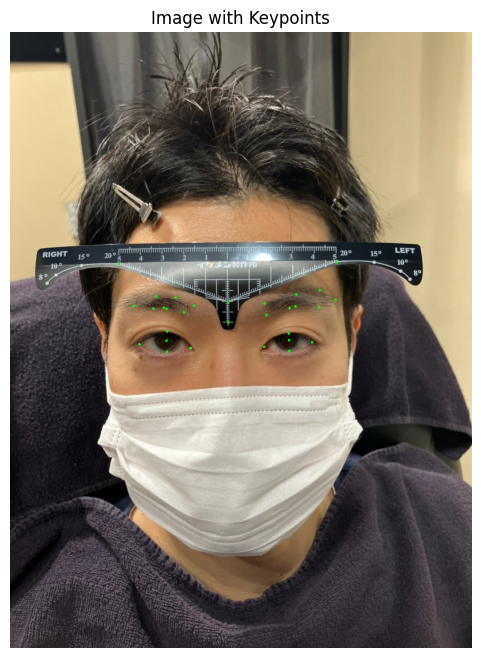

In [ ]:
# Gọi hàm:
visualize_all_from_folder("../data", image_id=6813)

In [24]:
import os
import shutil
import random
from glob import glob

def split_dataset(data_dir, output_dir='../data_split', train_ratio=0.8, seed=42):
    os.makedirs(output_dir, exist_ok=True)
    train_dir = os.path.join(output_dir, "train")
    test_dir = os.path.join(output_dir, "test")
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Lấy danh sách ảnh gốc
    image_paths = sorted(glob(os.path.join(data_dir, "*.JPG")))
    paired = [(img_path, img_path.replace(".JPG", ".json")) for img_path in image_paths]

    # Shuffle và chia
    random.seed(seed)
    random.shuffle(paired)
    split_idx = int(len(paired) * train_ratio)
    train_set = paired[:split_idx]
    test_set = paired[split_idx:]

    # Hàm copy
    def copy_to(set_data, target_dir):
        for img_path, json_path in set_data:
            shutil.copy2(img_path, os.path.join(target_dir, os.path.basename(img_path)))
            if os.path.exists(json_path):
                shutil.copy2(json_path, os.path.join(target_dir, os.path.basename(json_path)))

    copy_to(train_set, train_dir)
    copy_to(test_set, test_dir)

    print(f"✅ Done. Train: {len(train_set)} | Test: {len(test_set)}")
    print(f"📁 Saved in: {output_dir}/train and {output_dir}/test")

In [25]:
split_dataset(data_dir="../data", train_ratio=0.8)

✅ Done. Train: 85 | Test: 22
📁 Saved in: ../data_split/train and ../data_split/test
